In [203]:
import pandas as pd

## 读取数据

In [204]:
credit = pd.read_csv('../data/credit.csv')

In [205]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           36457 non-null  int64  
 1   ID                   36457 non-null  int64  
 2   CODE_GENDER          36457 non-null  object 
 3   FLAG_OWN_CAR         36457 non-null  object 
 4   FLAG_OWN_REALTY      36457 non-null  object 
 5   CNT_CHILDREN         36457 non-null  int64  
 6   AMT_INCOME_TOTAL     36457 non-null  float64
 7   NAME_INCOME_TYPE     36457 non-null  object 
 8   NAME_EDUCATION_TYPE  36457 non-null  object 
 9   NAME_FAMILY_STATUS   36457 non-null  object 
 10  NAME_HOUSING_TYPE    36457 non-null  object 
 11  DAYS_BIRTH           36457 non-null  int64  
 12  DAYS_EMPLOYED        36457 non-null  int64  
 13  FLAG_MOBIL           36457 non-null  int64  
 14  FLAG_WORK_PHONE      36457 non-null  int64  
 15  FLAG_PHONE           36457 non-null 

In [206]:
credit.head()

,Unnamed: 0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,dep_value,target
0,0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,...,-4542,1,1,0,0,NaN,2.0,-15.0,No,0
1,1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,...,-4542,1,1,0,0,NaN,2.0,-14.0,No,0
2,2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,...,-1134,1,0,0,0,Security staff,2.0,-29.0,No,0
3,3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,-3051,1,0,1,1,Sales staff,1.0,-4.0,No,0
4,4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0


## 丢弃无用columns

In [207]:
credit = credit.drop(columns=['Unnamed: 0','dep_value'], axis=1)
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

## 处理columns


In [208]:
credit['month_on_book'] = -credit['begin_month']
# 将年龄和工龄转换为年
credit['DAYS_BIRTH'] = -credit['DAYS_BIRTH'] / 365
credit['DAYS_EMPLOYED'] = credit['DAYS_EMPLOYED'] / 365
credit.rename(columns={'DAYS_BIRTH': 'age', 'DAYS_EMPLOYED':'work_year'}, inplace=True)
credit.drop(columns='begin_month', axis=1, inplace=True)
# 将工资按照 'k'为单位
credit['AMT_INCOME_TOTAL'] = credit['AMT_INCOME_TOTAL'] / 1000
# 处理flag类二分数据
dic = {'Y': 1, 'N': 0}
credit['FLAG_OWN_CAR'] = credit['FLAG_OWN_CAR'].replace(dic)
credit['FLAG_OWN_REALTY'] = credit['FLAG_OWN_REALTY'].replace(dic)
credit['CODE_GENDER'] = credit['CODE_GENDER'].replace({'M':1, 'F':0})

In [209]:
credit

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,age,work_year,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,month_on_book
0,5008804,1,1,1,0,427.5,Working,Higher education,Civil marriage,Rented apartment,32.890411,-12.443836,1,1,0,0,NaN,2.0,0,15.0
1,5008805,1,1,1,0,427.5,Working,Higher education,Civil marriage,Rented apartment,32.890411,-12.443836,1,1,0,0,NaN,2.0,0,14.0
2,5008806,1,1,1,0,112.5,Working,Secondary / secondary special,Married,House / apartment,58.832877,-3.106849,1,0,0,0,Security staff,2.0,0,29.0
3,5008808,0,0,1,0,270.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,-8.358904,1,0,1,1,Sales staff,1.0,0,4.0
4,5008809,0,0,1,0,270.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,-8.358904,1,0,1,1,Sales staff,1.0,0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,0,315.0,Working,Secondary / secondary special,Married,House / apartment,47.528767,-6.630137,1,0,0,0,Managers,2.0,1,11.0
36453,5149834,0,0,1,0,157.5,Commercial associate,Higher education,Married,House / apartment,33.936986,-3.630137,1,0,1,1,Medicine staff,2.0,1,23.0
36454,5149838,0,0,1,0,157.5,Pensioner,Higher education,Married,House / apartment,33.936986,-3.630137,1,0,1,1,Medicine staff,2.0,1,32.0
36455,5150049,0,0,1,0,283.5,Working,Secondary / secondary special,Married,House / apartment,49.200000,-1.794521,1,0,0,0,Sales staff,2.0,1,9.0


In [210]:
credit.isna().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
age                        0
work_year                  0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
target                     0
month_on_book              0
dtype: int64

可以看出职业一栏有许多空数据

In [211]:
# 对于缺失的工作column，由于其缺失值 11323过大，我们对其该column进行舍弃
credit.drop(columns='OCCUPATION_TYPE', inplace=True)

这样就处理了工作类型的缺失值

## 数据分析及处理

In [212]:
# 二分类对应列
flag_col = [i for i in credit.columns if i.startswith('FLAG_')]

In [213]:
from matplotlib import pyplot as plt

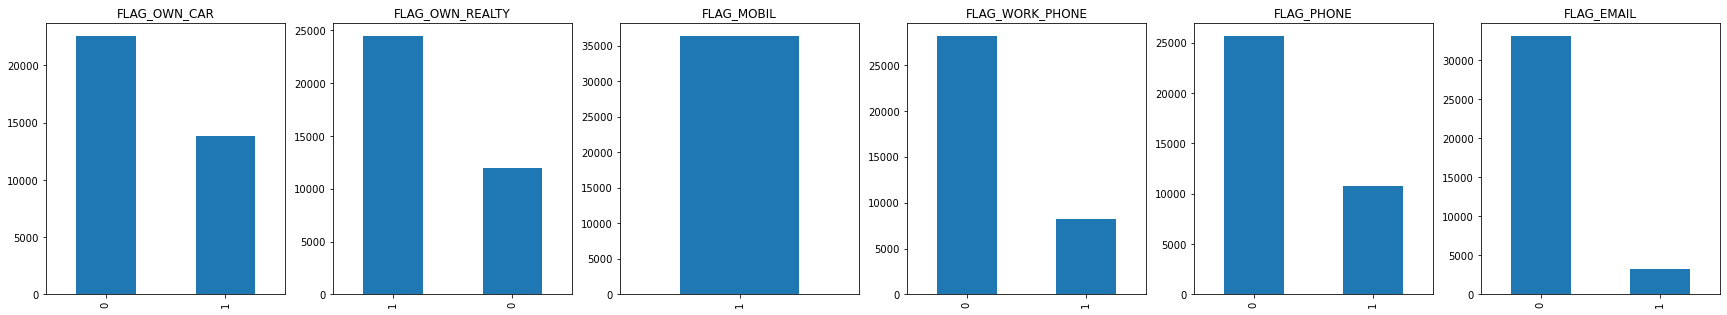

In [214]:
_, axes = plt.subplots(ncols=len(flag_col), figsize=(30, 5))
for col, ax in zip(flag_col, axes):
    credit[col].value_counts().plot(kind='bar', ax=ax, title=col)
plt.show()

In [215]:
# 由上图可知，FLAG_MOBIL全部为1，显然可以消除
credit.drop(columns='FLAG_MOBIL', axis=1, inplace=True)

In [216]:
name_cols = [col for col in credit.columns if col.startswith('NAME_')]

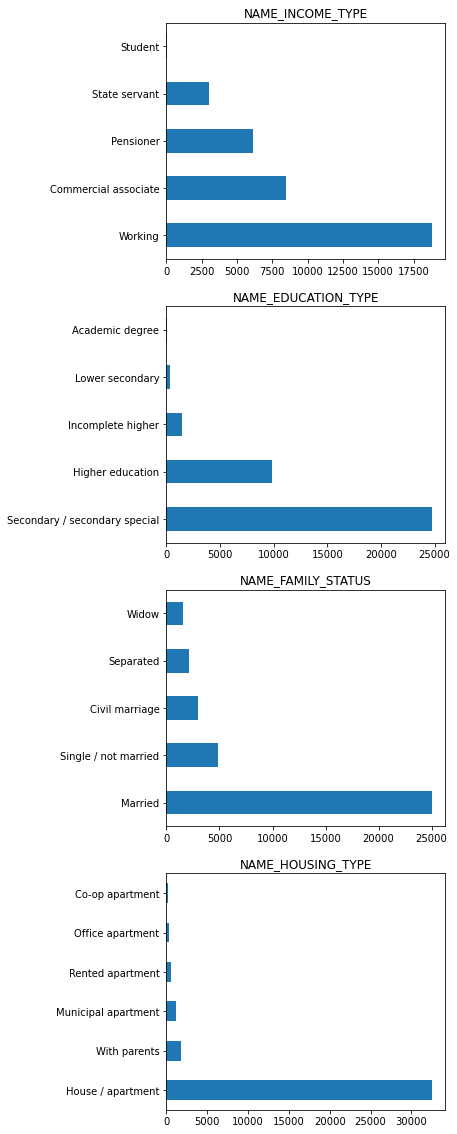

In [217]:
_, axes = plt.subplots(nrows=len(name_cols), figsize=(5, 20))
for col, ax in zip(name_cols, axes):
    credit[col].value_counts().plot(kind='barh', ax=ax, title=col)
plt.show()

In [218]:
amt_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'month_on_book', 'age', 'work_year']

In [219]:
import seaborn as sns

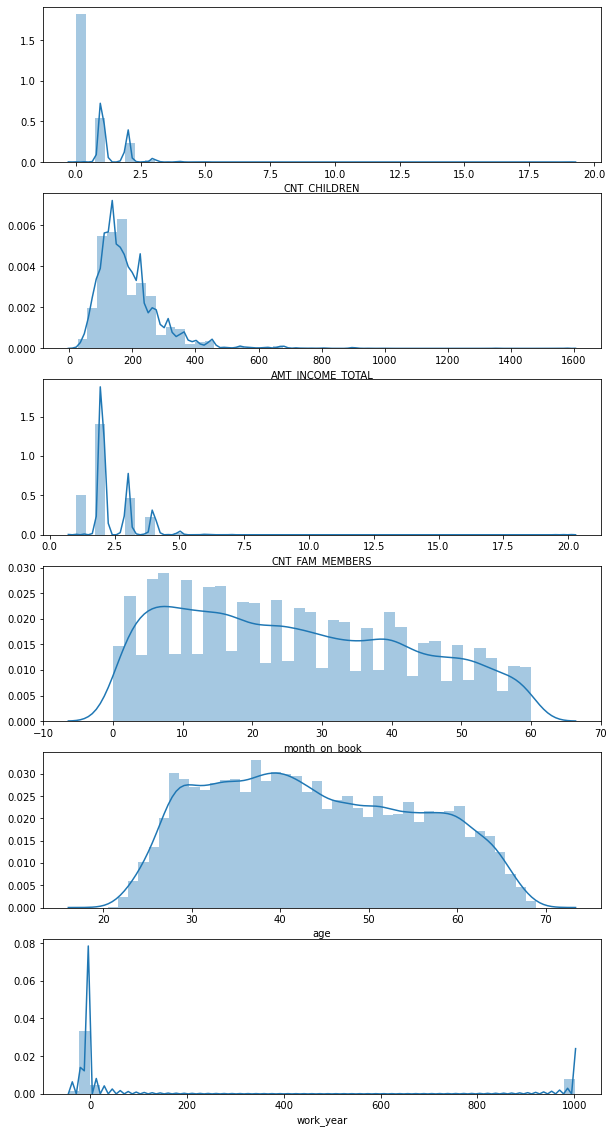

In [220]:
_, axes = plt.subplots(nrows=len(amt_cols), figsize=(10, 20))
for col, ax in zip(amt_cols, axes):
    sns.distplot(credit[col], ax=ax)
plt.show()

In [221]:
desc = round(credit[amt_cols].describe(), 0)
desc

,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,month_on_book,age,work_year
count,36457.0,36457.0,36457.0,36457.0,36457.0,36457.0
mean,0.0,187.0,2.0,26.0,44.0,162.0
std,1.0,102.0,1.0,17.0,12.0,377.0
min,0.0,27.0,1.0,-0.0,21.0,-43.0
25%,0.0,122.0,2.0,12.0,34.0,-9.0
50%,0.0,158.0,2.0,24.0,43.0,-4.0
75%,1.0,225.0,3.0,39.0,53.0,-1.0
max,19.0,1575.0,20.0,60.0,69.0,1001.0


In [222]:
credit[credit['work_year'] > 0]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,age,work_year,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,target,month_on_book
7,5008812,0,0,1,0,283.5,Pensioner,Higher education,Separated,House / apartment,61.545205,1000.665753,0,0,0,1.0,0,20.0
8,5008813,0,0,1,0,283.5,Pensioner,Higher education,Separated,House / apartment,61.545205,1000.665753,0,0,0,1.0,0,16.0
9,5008814,0,0,1,0,283.5,Pensioner,Higher education,Separated,House / apartment,61.545205,1000.665753,0,0,0,1.0,0,17.0
69,5008884,0,0,1,0,315.0,Pensioner,Secondary / secondary special,Widow,House / apartment,55.304110,1000.665753,0,0,0,1.0,0,40.0
150,5008974,0,0,1,0,112.5,Pensioner,Secondary / secondary special,Married,House / apartment,61.147945,1000.665753,0,0,0,2.0,0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36408,5126278,0,0,0,0,162.0,Pensioner,Secondary / secondary special,Married,House / apartment,58.202740,1000.665753,0,0,0,2.0,1,28.0
36418,5139446,0,0,1,0,112.5,Pensioner,Secondary / secondary special,Widow,House / apartment,58.235616,1000.665753,0,1,0,1.0,1,16.0
36432,5145690,0,0,1,0,306.0,Pensioner,Higher education,Married,House / apartment,59.150685,1000.665753,0,0,0,2.0,1,17.0
36434,5145817,0,0,1,0,90.0,Pensioner,Secondary / secondary special,Married,House / apartment,60.304110,1000.665753,0,0,0,2.0,1,39.0


有6135条数据存在work_year异常值，且全部为退休人员

In [223]:
# 使用插值法，将异常值替换为去掉异常值之后的平均值
credit.loc[credit['work_year'] > 0, 'work_year'] = credit[credit['work_year'] < 0]['work_year'].mean()
credit['work_year'] = -credit['work_year']

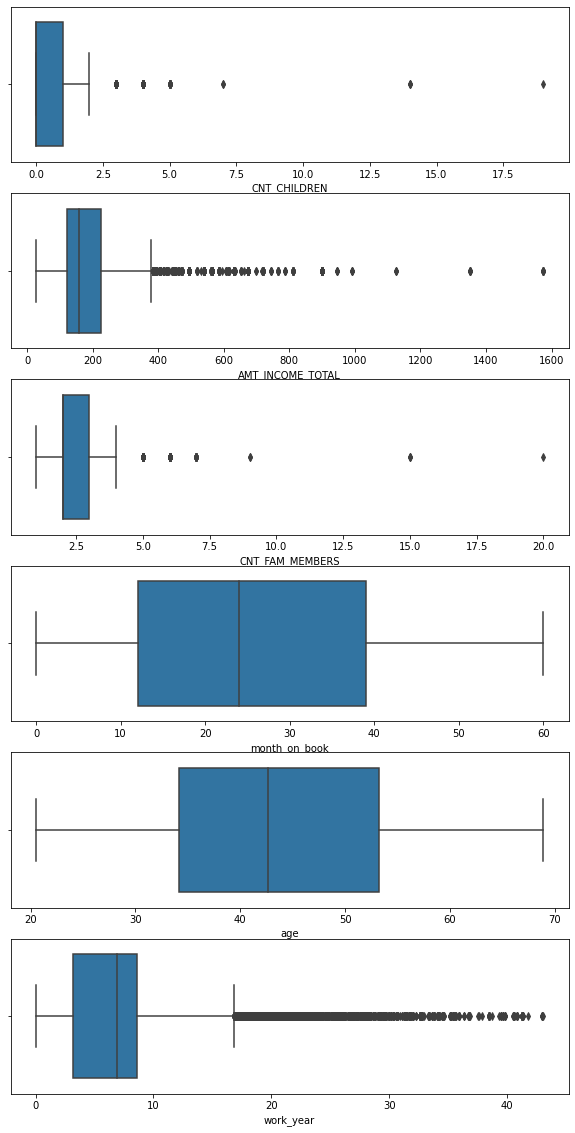

In [224]:
_, axes = plt.subplots(nrows=len(amt_cols), figsize=(10, 20))
for col, ax in zip(amt_cols, axes):
    sns.boxplot(credit[col], ax=ax)
plt.show()

## 变量分箱

In [225]:
credit.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,age,work_year,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,target,month_on_book
count,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.329895,0.379708,0.672189,0.430315,186.685737,43.767598,7.247955,0.225526,0.294813,0.089722,2.198453,0.016897,26.164193
std,4.187524e+04,0.470181,0.485321,0.469422,0.742367,101.789226,11.508356,5.890187,0.417934,0.455965,0.285787,0.911686,0.128886,16.501854
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,27.000000,20.517808,0.046575,0.000000,0.000000,0.000000,1.000000,0.000000,-0.000000
25%,5.042028e+06,0.000000,0.000000,0.000000,0.000000,121.500000,34.142466,3.202740,0.000000,0.000000,0.000000,2.000000,0.000000,12.000000
50%,5.074614e+06,0.000000,0.000000,1.000000,0.000000,157.500000,42.638356,6.898630,0.000000,0.000000,0.000000,2.000000,0.000000,24.000000
75%,5.115396e+06,1.000000,1.000000,1.000000,1.000000,225.000000,53.254795,8.638356,0.000000,1.000000,0.000000,3.000000,0.000000,39.000000
max,5.150487e+06,1.000000,1.000000,1.000000,19.000000,1575.000000,68.909589,43.049315,1.000000,1.000000,1.000000,20.000000,1.000000,60.000000


17


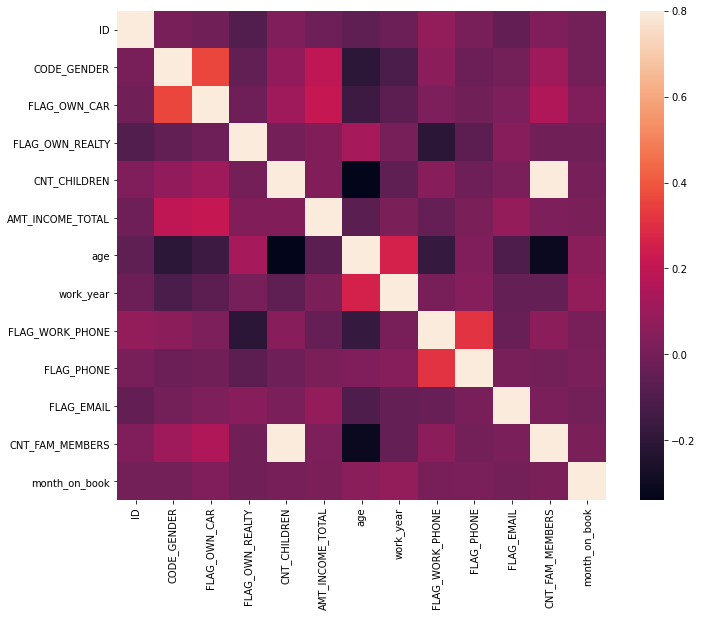

In [226]:
feat_cols: list = credit.columns.to_list()
feat_cols.remove('target')
feat_cols
credit_train:pd.DataFrame = credit[feat_cols]
corr_mat = credit_train.corr()
_, _ = plt.subplots(figsize=(12, 9))
print(len(feat_cols))
sns.heatmap(corr_mat, vmax=.8, square=True)

小孩个数和家庭成员个数显然相关

* ### 小孩个数

In [227]:
credit.drop(columns='CNT_CHILDREN', inplace=True)

可以看出有超过2个小孩的家庭占少数，应当进行合并

* ### 家庭成员个数

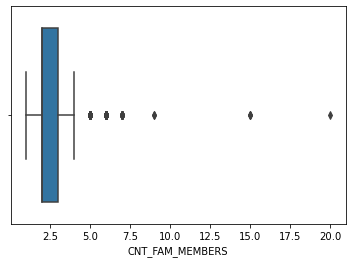

In [228]:
# 将3个及其以上的家庭CNT_FAM_MEMBERS设为more
sns.boxplot(credit['CNT_FAM_MEMBERS'])
credit.loc[credit['CNT_FAM_MEMBERS'] >= 3, 'CNT_FAM_MEMBERS'] = 'more'

In [229]:
credit['CNT_FAM_MEMBERS'].value_counts()

2.0     19463
more    10007
1.0      6987
Name: CNT_FAM_MEMBERS, dtype: int64

* ## 住房情况

In [230]:
credit['NAME_HOUSING_TYPE'].value_counts()

House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: NAME_HOUSING_TYPE, dtype: int64

In [231]:
# 我们将用户划分为 拥有/无 住房和公寓（1/0），从而将上述多类型变量转换为二分类 HOUSING_STATUS
credit['housing-status'] = credit['NAME_HOUSING_TYPE'].apply(lambda x: 1 if x == 'House / apartment' else 0)
credit.drop(columns='NAME_HOUSING_TYPE', inplace=True)

In [232]:
credit['housing-status'].value_counts()

1    32548
0     3909
Name: housing-status, dtype: int64

* ### 婚姻情况

In [233]:
credit['NAME_FAMILY_STATUS'].value_counts()

Married                 25048
Single / not married     4829
Civil marriage           2945
Separated                2103
Widow                    1532
Name: NAME_FAMILY_STATUS, dtype: int64

In [234]:
credit['marriage_status'] = credit['NAME_FAMILY_STATUS'].apply(lambda x: 1 if (x == 'Married' or x == 'Civil marriage') else 0)
credit.drop(columns='NAME_FAMILY_STATUS', inplace=True)

In [235]:
credit['marriage_status'].value_counts()

1    27993
0     8464
Name: marriage_status, dtype: int64

* ## 无量纲化

In [236]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scl = StandardScaler()
rbs = RobustScaler()
# 年龄和帐龄几乎无离群值，正常处理
scl_data = scl.fit_transform(credit[['age', 'month_on_book']])
# 离群值较多使用 RobustScaler 处理
rbs_data = rbs.fit_transform(credit[['work_year', 'AMT_INCOME_TOTAL']])
credit[['age', 'month_on_book']] = scl_data
credit[['work_year', 'AMT_INCOME_TOTAL']] = rbs_data
credit

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,age,work_year,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,target,month_on_book,housing-status,marriage_status
0,5008804,1,1,1,2.608696,Working,Higher education,-0.945169,1.020161,1,0,0,2,0,-0.676551,0,1
1,5008805,1,1,1,2.608696,Working,Higher education,-0.945169,1.020161,1,0,0,2,0,-0.737151,0,1
2,5008806,1,1,1,-0.434783,Working,Secondary / secondary special,1.309091,-0.697581,0,0,0,2,0,0.171850,1,1
3,5008808,0,0,1,1.086957,Commercial associate,Secondary / secondary special,0.746300,0.268649,0,1,1,1,0,-1.343152,1,0
4,5008809,0,0,1,1.086957,Commercial associate,Secondary / secondary special,0.746300,0.268649,0,1,1,1,0,-0.009950,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,1.521739,Working,Secondary / secondary special,0.326825,-0.049395,0,0,0,2,1,-0.918951,1,1
36453,5149834,0,0,1,0.000000,Commercial associate,Higher education,-0.854227,-0.601310,0,1,1,2,1,-0.191750,1,1
36454,5149838,0,0,1,0.000000,Pensioner,Higher education,-0.854227,-0.601310,0,1,1,2,1,0.353650,1,1
36455,5150049,0,0,1,1.217391,Working,Secondary / secondary special,0.472046,-0.939012,0,0,0,2,1,-1.040152,1,1


## 使用xgboost 试一试

In [237]:
import xgboost

In [238]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

In [239]:
credit = pd.get_dummies(credit)
feat_cols = credit.columns.to_list()
feat_cols.remove('ID')
feat_cols.remove('target')
X, Y = credit[feat_cols], credit['target']
Y = Y.astype(int)

In [240]:
from sklearn.model_selection import train_test_split
X_b, Y_b = SMOTEENN().fit_sample(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_b, Y_b, test_size=0.3)

In [241]:
from xgboost import XGBClassifier, plot_importance

In [242]:
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [243]:
y_pred = model.predict(X_test)

In [244]:
from sklearn import metrics

In [245]:
# 准确率
metrics.accuracy_score(Y_test, y_pred)

0.9904083708763262

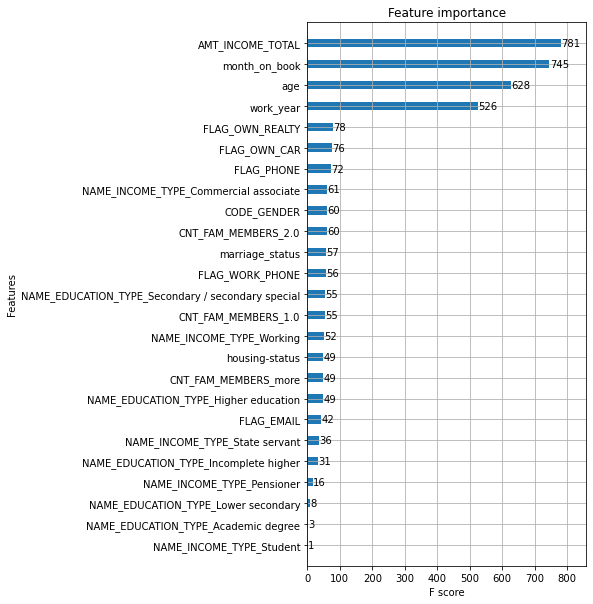

In [246]:
fig, ax = plt.subplots(figsize=(5, 10))
plot_importance(model, ax=ax, height=0.4)

In [247]:
# 召回率
metrics.recall_score(y_pred, Y_test)

0.9931107071093676

In [248]:
cm = metrics.confusion_matrix(y_pred, Y_test)

* ## 画出混淆矩阵

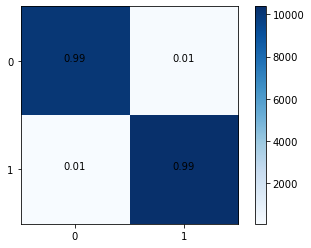

In [249]:
import numpy as np
classes = list(set(Y_test))
indices = range(len(cm))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
cm = cm / cm.sum(axis=1)[:,]
for i in range(len(cm)):
    for j in range(len(cm[i])):
        plt.text(i, j, format(cm[i][j], '.2f'), horizontalalignment='center')

* ## XGB调参数

In [250]:
xg_train = xgboost.DMatrix(X_b, Y_b)
clf = XGBClassifier()
cv_res = xgboost.cv(clf.get_xgb_params(), dtrain=xg_train, nfold=5, num_boost_round=500 ,metrics=['auc'])

In [251]:
clf.set_params(n_estimators=cv_res.shape[0])

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [252]:
clf.fit(X_b, Y_b)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [253]:
y_pre = clf.predict(X_test)

In [254]:
metrics.accuracy_score(y_pre, Y_test)

1.0

In [255]:
cm = metrics.confusion_matrix(y_pre, Y_test)

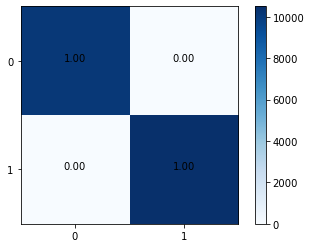

In [256]:
import numpy as np
classes = list(set(Y_test))
indices = range(len(cm))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
cm = cm / cm.sum(axis=1)[:,]
for i in range(len(cm)):
    for j in range(len(cm[i])):
        plt.text(i, j, format(cm[i][j], '.2f'), horizontalalignment='center')